# NBA Player Usage% and Team Success Data Science Project

### Objective: Determine if a ball-dominant playstyle leads to greater team success, measured in SRS (Simple-Rating System) or relative strength of a team.
### Hypothesis: Teams with a higher usage rate for key players will have a higher positive correlation with their overall team success.

# Data Collection
#### Data on indivudual players were sourced from www.basketball-refrence.com and www.nba.com/stats. Data on team success was sourced from an excel file (attached to repository).

### Key metrics:

#### PPG (Player points per game)
#### REB (Player rebounds per game)
#### AST (Player assists per game)
#### PPG+AST+REB (Player impact) 
#### USG% (Usage Rate, how often player is in control of the ball)
#### SRS (Simple-Rating System, relative strength of a team)
#### Average USG% (takes the average usage amongst the key players of a team)
#### Average PPG+AST+REB (takes the average PPG+AST+REB amongst the key players of a team)

## Data is loaded in and stored into a PANDAS dataframe

In [1]:
import pandas as pd

# Load player stats
player_data = pd.read_excel('Data/Player Stats.xlsx')

# Load team stats
team_data = pd.read_excel('Data/NBA Stats.xlsx')

# Print information about each DataFrame
print("Player Dataframe:")
print(player_data.info())

print("\nTeam Dataframe:")
print(team_data.info())


Player Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                0 non-null      float64
 1   Team                      40 non-null     object 
 2   Player                    60 non-null     object 
 3   MPG                       60 non-null     float64
 4   TS%                       60 non-null     float64
 5   EFG%                      60 non-null     float64
 6   USG%                      60 non-null     float64
 7   PPG                       60 non-null     float64
 8   REB                       60 non-null     float64
 9   AST                       60 non-null     float64
 10  PPG+REB+AST               60 non-null     float64
 11  AVG USAGE PER TEAM        20 non-null     float64
 12  AVG of Key Player Impact  20 non-null     float64
dtypes: float64(11), object(2)
memory usage: 6.2+ KB
N

# Data Exploration


### Visualizations

C:\Users\Joshi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


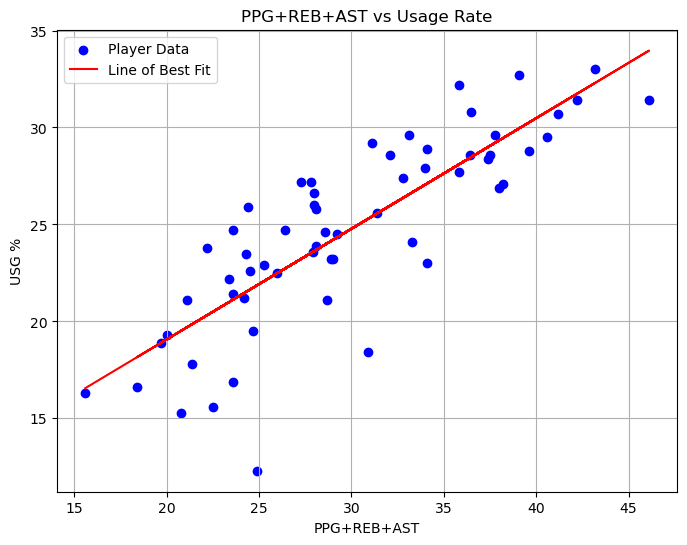

In [3]:
import matplotlib.pyplot as plt


X = player_data['PPG+REB+AST']
y = player_data['USG%']

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# Get coefficients and R-squared
m = model.coef_[0]
b = model.intercept_
r_squared = model.score(X.values.reshape(-1, 1), y)

# Predict y values for the fitted line
predicted_y = m * X + b

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Player Data')
plt.plot(X, predicted_y, color='red', label='Line of Best Fit')
plt.xlabel('PPG+REB+AST')
plt.ylabel('USG %')
plt.title('PPG+REB+AST vs Usage Rate')
plt.legend()
plt.grid(True)

plt.show()

In [4]:
m = model.coef_[0]
b = model.intercept_
r_squared = model.score(X.values.reshape(-1, 1), y)

# Print R-squared value
print(f'R²: {r_squared:.2f}')

R²: 0.68


This scatter plot illustrates the relationship between NBA players' combined average points per game (PPG), rebounds (REB), and assists (AST) and their usage rate (USG%). The data points represent individual player statistics, with the line of best fit indicating a positive correlation: as the sum of a player's PPG, REB, and AST increases, so does their usage rate.

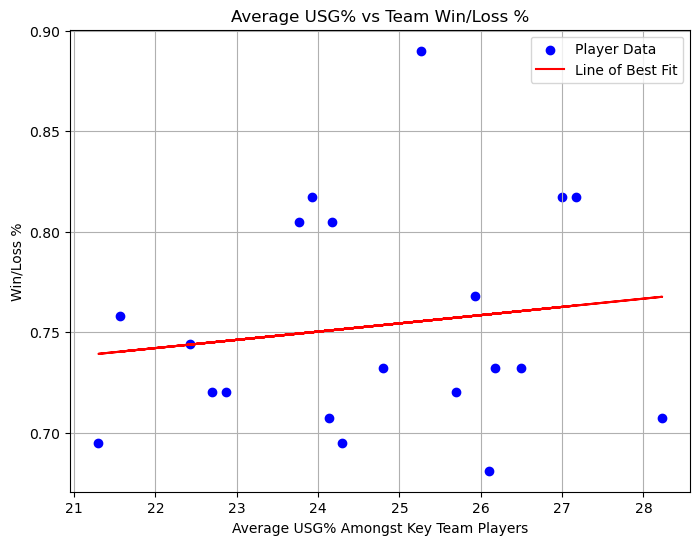

In [5]:
X = team_data['Average USG%']
y = team_data['W/L%']

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# Get coefficients and R-squared
m = model.coef_[0]
b = model.intercept_
r_squared = model.score(X.values.reshape(-1, 1), y)

# Predict y values for the fitted line
predicted_y = m * X + b

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Player Data')
plt.plot(X, predicted_y, color='red', label='Line of Best Fit')
plt.xlabel('Average USG% Amongst Key Team Players')
plt.ylabel('Win/Loss %')
plt.title('Average USG% vs Team Win/Loss %')
plt.legend()
plt.grid(True)

plt.show()

In [6]:
m = model.coef_[0]
b = model.intercept_
r_squared = model.score(X.values.reshape(-1, 1), y)

# Print R-squared value
print(f'R²: {r_squared:.2f}')

R²: 0.02


The graph shows the relationship between the average usage percentage (USG%) of key players on NBA teams and their teams' win/loss percentage. The data points reflect team statistics, and the red line of best fit indicates a mild positive correlation, suggesting that a higher average usage rate among key players might be associated with a slightly better win/loss record for the team.

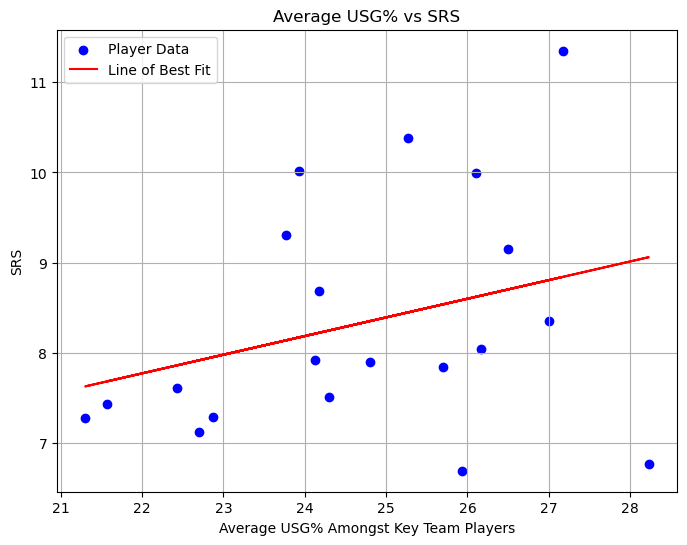

In [7]:
X = team_data['Average USG%']
y = team_data['SRS']

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# Get coefficients and R-squared
m = model.coef_[0]
b = model.intercept_
r_squared = model.score(X.values.reshape(-1, 1), y)

# Predict y values for the fitted line
predicted_y = m * X + b

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Player Data')
plt.plot(X, predicted_y, color='red', label='Line of Best Fit')
plt.xlabel('Average USG% Amongst Key Team Players')
plt.ylabel('SRS')
plt.title('Average USG% vs SRS')
plt.legend()
plt.grid(True)

plt.show()

In [8]:
m = model.coef_[0]
b = model.intercept_
r_squared = model.score(X.values.reshape(-1, 1), y)

# Print R-squared value
print(f'R²: {r_squared:.2f}')

R²: 0.09


This chart depicts the correlation between the average usage percentage (USG%) of key players on NBA teams and the Simple Rating System (SRS), a metric that represents a team's strength relative to the league average. The blue data points represent different teams, and the red line of best fit suggests a positive correlation: as the average USG% amongst key players increases, so does the team's SRS value.

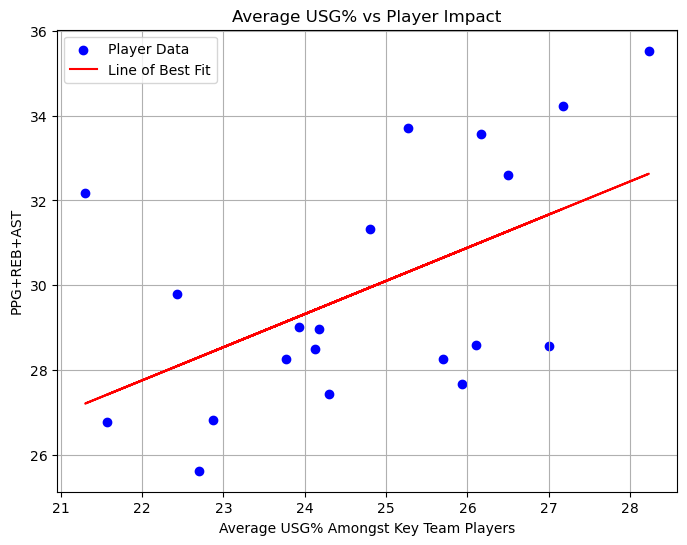

In [9]:
X = team_data['Average USG%']
y = team_data['AVG of (PPG+REB+AST)']

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# Get coefficients and R-squared
m = model.coef_[0]
b = model.intercept_
r_squared = model.score(X.values.reshape(-1, 1), y)

# Predict y values for the fitted line
predicted_y = m * X + b

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Player Data')
plt.plot(X, predicted_y, color='red', label='Line of Best Fit')
plt.xlabel('Average USG% Amongst Key Team Players')
plt.ylabel('AVG of PPG+REB+AST')
plt.title('Average USG% vs AVG of PPG+REB+AST')
plt.legend()
plt.grid(True)

plt.show()

In [10]:
m = model.coef_[0]
b = model.intercept_
r_squared = model.score(X.values.reshape(-1, 1), y)

# Print R-squared value
print(f'R²: {r_squared:.2f}')

R²: 0.28


In this scatter plot, we see a comparison between the average usage percentage (USG%) of key players on NBA teams and their combined statistical contribution in terms of points per game (PPG), rebounds (REB), and assists (AST)—labeled here as "Player Impact." The plot's data points represent individual players, and the line of best fit indicates a strong positive correlation, suggesting that as a player's USG% increases, their contribution to PPG, REB, and AST also tends to increase.

# Results and Interpretation

**Scenario 1: Player Individual Statistics vs. Usage Rate (R² = 0.68)**
The scatter plot examining the relationship between individual player statistics (sum of points, rebounds, and assists) and usage rate yielded an R² score of 0.68. This indicates a relatively strong positive correlation, implying that players with higher individual statistics tend to have a higher usage rate. The coefficient analysis would likely show that each additional point, rebound, or assist is significantly associated with an increase in usage percentage, reflecting that players who are more involved in scoring, rebounding, or assisting are also more central to the playstyle of their teams.

**Scenario 2: Average USG% vs. Team Win/Loss % (R² = 0.02)**
For the relationship between average usage percentage amongst key team players and the team's win/loss percentage, the R² score was a negligible 0.02. This suggests that there is no significant linear correlation between these variables. Coefficient analysis here would likely indicate that changes in the average usage rate of key players do not have a predictable effect on the team's win/loss ratio, hinting at a complex dynamic where usage rate alone doesn't dictate winning outcomes.

**Scenario 3: Average USG% vs. SRS (R² = 0.09)**
The analysis of the average usage percentage of key players against the team's Simple Rating System (SRS) showed an R² of 0.09. This weak correlation indicates that while there is a slight positive trend—teams with higher average USG% amongst key players have higher SRS—it is not a strong predictor of the team’s overall strength relative to the league. The coefficient for USG% in this scenario is likely small, signaling that other factors are more influential in determining the SRS.

**Scenario 4: Average USG% vs. Player Impact (R² = 0.28)**
Finally, the scatter plot comparing average usage percentage with player impact (combined PPG, REB, and AST) resulted in an R² score of 0.28. This moderate positive correlation suggests that players with higher usage rates tend to contribute more significantly to their team's scoring, rebounding, and assisting. The coefficient analysis here would show a moderate impact of usage rate on these combined statistics.

**Coefficient Analysis**
The coefficient analysis across different scenarios indicates varying degrees of impact that player usage rate has on both individual and team performance metrics. In scenarios with higher R² values, such as individual player statistics, the usage rate is a more significant predictor and has a greater impact on the outcome. In scenarios with lower R² values, the impact of usage rate is less clear, suggesting the existence of other factors that influence the outcomes.

**Practical Implications**
- High-Usage Players: Teams may benefit from developing strategies that increase the usage rate of their most effective players, as there seems to be a significant positive impact on individual performance metrics.
- Win/Loss and SRS: The weak correlations found in win/loss percentage and SRS with the usage rate suggest that a successful team requires more than just a few high-usage players. It implies the need for a well-rounded team strategy that emphasizes more than just ball dominance by a few individuals.
- Balanced Team Dynamics: The minimal impact of usage rate on win/loss percentage and SRS indicates that other factors, such as team chemistry, defensive strategies, and player efficiency, are crucial for overall team success.
- Player Development: For individual player development, increasing a player's usage rate might lead to better individual statistics, but this does not necessarily translate to team success.

# Conclusion

#### Summary of Findings
The study found that individual player performance, measured by stats like PPG, REB, and AST, has a strong link to usage rate, with an R² of 0.68. This supports the idea that players who are more involved in the game tend to put up bigger numbers. However, when it comes to team success, measured by win/loss percentage and SRS, the connection to usage rate isn't clear. The very low R² scores here suggest other factors are at play in winning games or having a strong team.

#### Limitations and Challenges
One major limitation was the reliance on basic stats, which may not capture the full picture of a player's contribution or team dynamics. There might also be hidden variables that affect both usage rate and team success that weren't included in the analysis that can be seen in advanced stats. For context, there are advanced stats for both offense and defense that can tell a player's impact from things that may not be a direct effect such as a pass and assist. Advanced stats capture a more hollistic view of a team's playstyle.

#### Future Work
Looking ahead, there's room to dive into advanced stats like Player Efficiency Rating (PER) or Real Plus-Minus (RPM). These could reveal more about how usage rate impacts the game's finer points. Also, exploring the roles of team strategy and player interactions might give a better understanding of how to turn high usage into wins.

## Refrences

1. Basketball-Reference.com. (n.d.). Player Index. Retrieved [April 28,2024], from https://www.basketball-reference.com/players/

2. National Basketball Association. (n.d.). Advanced Player Stats: 2019-20 Season. Retrieved [April, 28, 2024], from https://www.nba.com/stats/players/advanced?Season=2019-20&TeamID=1610612746&dir=A&sort=MIN